# 주가 예측
##20일치의 데이터를 통해 5일치 데이터 예측

In [46]:
!pip install finance-datareader

In [47]:
import FinanceDataReader as fd
from datetime import datetime, date, timedelta

company = '005930'  # 삼성전자
startdate = '1999-08-12'
today = date.today()  # 오늘 날짜

stock = fd.DataReader(company, startdate, today)
stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-08-12,3800,3860,3730,3800,740069,NaN
1999-08-13,3699,3779,3610,3700,719845,-0.026316
1999-08-16,3680,3890,3640,3800,700220,0.027027
1999-08-17,3820,3870,3660,3680,759830,-0.031579
1999-08-18,3600,3760,3540,3680,695577,0.000000
...,...,...,...,...,...,...
2023-11-23,73000,73200,72200,72400,6775614,-0.005495
2023-11-24,72400,72600,71700,71700,6676685,-0.009669
2023-11-27,71500,72100,71100,71300,9113857,-0.005579


In [48]:
del stock['Volume']
del stock['Change']

## 데이터 추가

In [49]:
dow = fd.DataReader('DJI', startdate, today)
nas = fd.DataReader('IXIC', startdate, today)
nvda = fd.DataReader('NVDA', startdate, today)
amd = fd.DataReader('AMD', startdate, today)
intc = fd.DataReader('INTC', startdate, today)
kospi = fd.DataReader('KS11', startdate, today)

In [50]:
stock['DOW'] = dow['Close'].shift(1)
stock['NAS'] = nas['Close'].shift(1)
stock['AMD'] = amd['Close'].shift(1)
stock['KS11'] = kospi['Close']
stock

,Open,High,Low,Close,DOW,NAS,AMD,KS11
Date,,,,,,,,
1999-08-12,3800,3860,3730,3800,NaN,NaN,NaN,949.35
1999-08-13,3699,3779,3610,3700,10789.389648,2549.489990,9.250000,917.47
1999-08-16,3680,3890,3640,3800,10973.650391,2637.810059,9.468750,907.28
1999-08-17,3820,3870,3660,3680,11046.790039,2645.280029,9.375000,873.70
1999-08-18,3600,3760,3540,3680,11117.080078,2671.229980,9.312500,868.94
...,...,...,...,...,...,...,...,...
2023-11-23,73000,73200,72200,72400,NaN,NaN,NaN,2514.96
2023-11-24,72400,72600,71700,71700,35273.031250,14265.860352,122.510002,2496.63
2023-11-27,71500,72100,71100,71300,35390.148438,14250.849609,122.309998,2495.66


## NaN 처리

In [51]:
stock = stock.fillna(method = 'ffill')
stock

,Open,High,Low,Close,DOW,NAS,AMD,KS11
Date,,,,,,,,
1999-08-12,3800,3860,3730,3800,NaN,NaN,NaN,949.35
1999-08-13,3699,3779,3610,3700,10789.389648,2549.489990,9.250000,917.47
1999-08-16,3680,3890,3640,3800,10973.650391,2637.810059,9.468750,907.28
1999-08-17,3820,3870,3660,3680,11046.790039,2645.280029,9.375000,873.70
1999-08-18,3600,3760,3540,3680,11117.080078,2671.229980,9.312500,868.94
...,...,...,...,...,...,...,...,...
2023-11-23,73000,73200,72200,72400,35088.289063,14199.980469,119.160004,2514.96
2023-11-24,72400,72600,71700,71700,35273.031250,14265.860352,122.510002,2496.63
2023-11-27,71500,72100,71100,71300,35390.148438,14250.849609,122.309998,2495.66


In [52]:
stock = stock.fillna(method = 'bfill')
stock.isnull().sum()

Open     0
High     0
Low      0
Close    0
DOW      0
NAS      0
AMD      0
KS11     0
dtype: int64

## 정규화

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_stock = stock.copy()
scale_stock.iloc[:,:] = scaler.fit_transform(scale_stock.iloc[:,:])
scale_stock

,Open,High,Low,Close,DOW,NAS,AMD,KS11
Date,,,,,,,,
1999-08-12,-1.079556,-1.080736,-1.079085,-1.081315,-0.735515,-0.617774,-0.499332,-1.124987
1999-08-13,-1.084200,-1.084431,-1.084650,-1.085917,-0.735515,-0.617774,-0.499332,-1.172211
1999-08-16,-1.085073,-1.079367,-1.083259,-1.081315,-0.713114,-0.594464,-0.492300,-1.187305
1999-08-17,-1.078636,-1.080280,-1.082331,-1.086837,-0.704222,-0.592492,-0.495314,-1.237047
1999-08-18,-1.088751,-1.085298,-1.087896,-1.086837,-0.695676,-0.585643,-0.497323,-1.244098
...,...,...,...,...,...,...,...,...
2023-11-23,2.102162,2.082570,2.095973,2.075479,2.218613,2.457157,3.034071,1.194151
2023-11-24,2.074575,2.055198,2.072787,2.043266,2.241073,2.474545,3.141768,1.166999
2023-11-27,2.033194,2.032388,2.044964,2.024860,2.255311,2.470583,3.135338,1.165562


In [54]:
stock

,Open,High,Low,Close,DOW,NAS,AMD,KS11
Date,,,,,,,,
1999-08-12,3800,3860,3730,3800,10789.389648,2549.489990,9.250000,949.35
1999-08-13,3699,3779,3610,3700,10789.389648,2549.489990,9.250000,917.47
1999-08-16,3680,3890,3640,3800,10973.650391,2637.810059,9.468750,907.28
1999-08-17,3820,3870,3660,3680,11046.790039,2645.280029,9.375000,873.70
1999-08-18,3600,3760,3540,3680,11117.080078,2671.229980,9.312500,868.94
...,...,...,...,...,...,...,...,...
2023-11-23,73000,73200,72200,72400,35088.289063,14199.980469,119.160004,2514.96
2023-11-24,72400,72600,71700,71700,35273.031250,14265.860352,122.510002,2496.63
2023-11-27,71500,72100,71100,71300,35390.148438,14250.849609,122.309998,2495.66


## X / y

In [55]:
import pandas as pd
import numpy as np
from tensorflow import keras

standard_days = 20
forecast_days = 5

x = []
y = []

for i in range(len(scale_stock) - standard_days - forecast_days + 1):
  x.append(scale_stock.iloc[i:i+standard_days])
  y.append(scale_stock.iloc[i+standard_days:i+standard_days + forecast_days][['Open', 'High', 'Low', 'Close']])

x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(5976, 20, 8)
(5976, 5, 4)


## train / validate

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [57]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(4780, 20, 8) (4780, 5, 4)
(1196, 20, 8) (1196, 5, 4)


In [58]:
# y값 1차원 배열로 변환
y_train = y_train.reshape(-1, y_train.shape[1]*y_train.shape[2])
y_val = y_val.reshape(-1, y_val.shape[1]*y_val.shape[2])
print(y_train.shape, y_val.shape)

(4780, 20) (1196, 20)


## Modeling

In [59]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dense(y_train.shape[1]))

model.compile(loss='mae', optimizer='adam', metrics='mae')

In [60]:
mc = ModelCheckpoint('stock4_samsung.h5', monitor='val_mae', mode='min', save_best_only=True)
ea = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

In [61]:
history = model.fit(x_train, y_train, epochs=1000, callbacks=[mc, ea], validation_data=(x_val, y_val))

Epoch 1/1000
150/150 [==============================] - 9s 16ms/step - loss: 0.2300 - mae: 0.2300 - val_loss: 0.0488 - val_mae: 0.0488
Epoch 2/1000
  7/150 [>.............................] - ETA: 2s - loss: 0.1172 - mae: 0.1172

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


150/150 [==============================] - 3s 21ms/step - loss: 0.1159 - mae: 0.1159 - val_loss: 0.0467 - val_mae: 0.0467
Epoch 3/1000
150/150 [==============================] - 2s 15ms/step - loss: 0.1051 - mae: 0.1051 - val_loss: 0.0454 - val_mae: 0.0454
Epoch 4/1000
150/150 [==============================] - 2s 13ms/step - loss: 0.0967 - mae: 0.0967 - val_loss: 0.0487 - val_mae: 0.0487
Epoch 5/1000
150/150 [==============================] - 2s 12ms/step - loss: 0.0924 - mae: 0.0924 - val_loss: 0.0442 - val_mae: 0.0442
Epoch 6/1000
150/150 [==============================] - 2s 12ms/step - loss: 0.0881 - mae: 0.0881 - val_loss: 0.0477 - val_mae: 0.0477
Epoch 7/1000
150/150 [==============================] - 2s 12ms/step - loss: 0.0854 - mae: 0.0854 - val_loss: 0.0640 - val_mae: 0.0640
Epoch 8/1000
150/150 [==============================] - 2s 13ms/step - loss: 0.0812 - mae: 0.0812 - val_loss: 0.0530 - val_mae: 0.0530
Epoch 9/1000
150/150 [==============================] - 3s 20ms/step

In [62]:
model = load_model('stock4_samsung.h5')
score = model.evaluate(x_val, y_val, verbose=0)
print(score[0])

0.04423435404896736


## Predict

In [63]:
test_stock = stock.iloc[-20:,:]
test_stock

,Open,High,Low,Close,DOW,NAS,AMD,KS11
Date,,,,,,,,
2023-11-02,70000,70000,69400,69700,33274.578125,13061.469727,108.040001,2343.12
2023-11-03,69700,70200,69500,69600,33839.078125,13294.190430,107.830002,2368.34
2023-11-06,69800,70900,69300,70900,34061.320313,13478.280273,112.250000,2502.37
2023-11-07,70600,70900,70000,70900,34095.859375,13518.780273,111.750000,2443.96
2023-11-08,71300,71400,69700,69900,34152.601563,13639.860352,113.449997,2421.62
2023-11-09,69900,70800,69600,70300,34112.269531,13650.410156,113.589996,2427.08
2023-11-10,70000,70500,69500,70500,33891.941406,13521.450195,113.489998,2409.66
2023-11-13,71300,71300,70300,70400,34283.101563,13798.110352,118.589996,2403.76
2023-11-14,71000,71100,70600,70800,34337.871094,13767.740234,116.790001,2433.25


In [64]:
predict_stock = model.predict(np.array([test_stock]))
print(predict_stock)
print(predict_stock.shape)

1/1 [==============================] - 0s 407ms/step
[[3.382961  3.5787098 3.4815497 3.5884976 3.4085891 3.56519   3.5427492
  3.4946313 3.4372115 3.4272563 3.4726129 3.6034698 3.6736746 3.4543817
  3.5109456 3.463213  3.5394099 3.7194152 3.5254583 3.5257156]]
(1, 20)


In [65]:
predict_stock = predict_stock.reshape((forecast_days, -1))
predict_stock

array([[3.382961 , 3.5787098, 3.4815497, 3.5884976],
       [3.4085891, 3.56519  , 3.5427492, 3.4946313],
       [3.4372115, 3.4272563, 3.4726129, 3.6034698],
       [3.6736746, 3.4543817, 3.5109456, 3.463213 ],
       [3.5394099, 3.7194152, 3.5254583, 3.5257156]], dtype=float32)

In [66]:
# 원본 데이터의 평균과 표준편차
original_means = scaler.mean_[:4]
original_stds = np.sqrt(scaler.var_)[:4]

print(original_means, original_stds)

[27279.53466667 27549.8415     27000.433      27297.965     ] [21749.2573586  21920.10576195 21564.95896618 21730.90748931]


In [67]:
# 역변환을 수행하여 원래 스케일로 복원
inverse_predict = predict_stock * original_stds + original_means
inverse_predict

array([[100856.42484609, 105995.53970111, 102079.9102783 ,
        105279.27521223],
       [101413.81676904, 105699.18504552, 103399.67340278,
        103239.47428169],
       [102036.33247013, 102675.66307213, 101887.18678427,
        105604.63492114],
       [107179.22863353, 103270.25380107, 102713.82990256,
        102556.72559988],
       [104259.07095452, 109079.81578996, 103026.79735014,
        103914.96430954]])

In [68]:
predict_df = pd.DataFrame(inverse_predict,
                          columns=['Open', 'High', 'Low', 'Close'])
predict_df = predict_df.applymap(lambda x:int(x))
predict_df

,Open,High,Low,Close
0,100856,105995,102079,105279
1,101413,105699,103399,103239
2,102036,102675,101887,105604
3,107179,103270,102713,102556
4,104259,109079,103026,103914


In [69]:
last_date = stock.index[-1]
date_range = pd.date_range(start = last_date + pd.Timedelta(days=1),
                           periods = forecast_days, freq='D')
predict_df.index = date_range
predict_df

,Open,High,Low,Close
2023-11-30,100856,105995,102079,105279
2023-12-01,101413,105699,103399,103239
2023-12-02,102036,102675,101887,105604
2023-12-03,107179,103270,102713,102556
2023-12-04,104259,109079,103026,103914


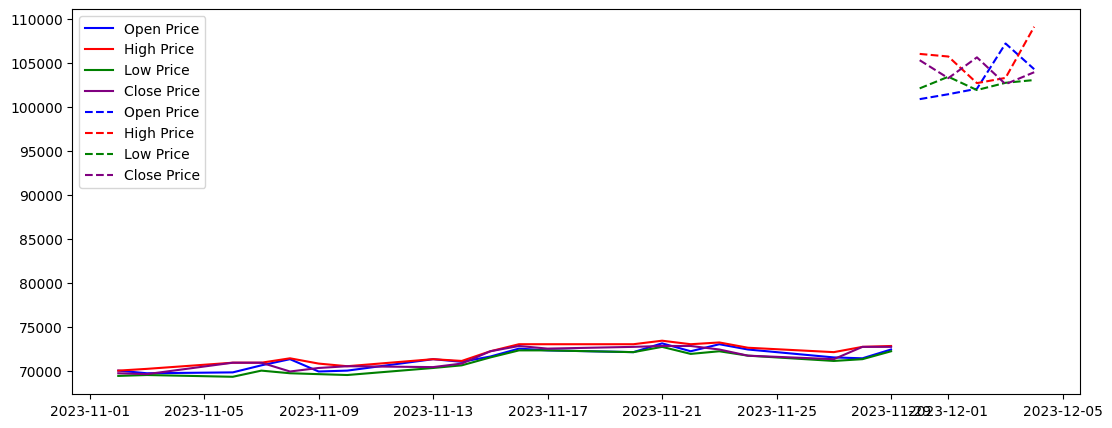

In [70]:
import matplotlib.pyplot as plt
cols = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(13, 5))
true_df = stock.iloc[-20:,:]

plt.plot(true_df['Open'], label='Open Price', color='blue')
plt.plot(true_df['High'], label='High Price', color='red')
plt.plot(true_df['Low'], label='Low Price', color='green')
plt.plot(true_df['Close'], label='Close Price', color='purple')

plt.plot(predict_df['Open'], label='Open Price', linestyle='--', color='blue')
plt.plot(predict_df['High'], label='High Price', linestyle='--',color='red')
plt.plot(predict_df['Low'], label='Low Price', linestyle='--',color='green')
plt.plot(predict_df['Close'], label='Close Price', linestyle='--',color='purple')

plt.legend()
plt.show()